

# Project: Investigate a Dataset - [noshowappointments-]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>


<a id='intro'></a>
## Introduction



    This no-show dataset I used for my project contains 14 variables and 110527 observations.The main aim is to identify the patient that booked an appointment, got appointment verification but still didn’t show up for their appiontment,In this dataset I have information about the appointments and information of the patients in question: general and medical.








### My Research Questions



1. Could receiving or not receiving an sms message be a determinant factor  to not showing up for the appointment booked ?

2. what is the percentage of patients that missed their appointment?

3. Does the age of the patient have a significant effect on showing up and not showing up for appointments?

4. Does the patient health condition have any effect on patients not showing up ?

5. Factors on the data set that can help predict their will be a no-show or show-up?


In [1]:
#Selection of the all of the packages i want to import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns




In [2]:
# i Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




In [3]:
#i import the pandas python package, then i loaded my csv file
import pandas as pd

ns_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#i used the head() to display the first five rows to get a closer look of the no-show data set

ns_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:

#i used info() to look for instances of missing or possibly errant data.
ns_df.info()

#i also observed there are also no null fields in the data set, but the type of some fields are wrong in this data set
#like the ScheduledDay and AppointmentDay, So i wil convert them to datetime type instead of string and the No-show value should be numeric for easier function call.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
ns_df.shape

#The ouput of my shape shows that there are 110,527 entries(rows) described by 14 fields(columns)
#i need to check for duplicates

(110527, 14)


### Data Cleaning


In [6]:
def datetime():
    datetime = pd.to_datetime
    return datetime
    
    

In [7]:
 
# Convert AppointmentDay to datetime type
ns_df.AppointmentDay = datetime()(ns_df.AppointmentDay)
ns_df.AppointmentDay.head(2)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [8]:
# Convert ScheduledDay to datetime type
ns_df.ScheduledDay = datetime()(ns_df.ScheduledDay)
ns_df.ScheduledDay.head(2)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [9]:
#The column "Handcap" have a maximum value of 4 which should not exceed 0 or 1 to indicate whether the patient is physically challenged or not.
# i used the unique() to check for the Handcap values in this dataset.
ns_df.Handcap.unique()


array([0, 1, 2, 3, 4])

In [10]:
# i used the value_counts() to check for the Handcap values in this dataset and the number of patients for each.
had_v = ns_df.Handcap.value_counts()
had_v

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [11]:
had = ns_df['Handcap'].count()
had

110527

In [12]:
# i need to get the Percentage of total unwanted values which are (2,3,4) 
total_had = had_v[2] + had_v[3] + had_v[4]
perc = (total_had/had)*100
perc



0.18004650447401993

In [13]:
#From my finding the unwanted Handcap values are 1, 2, 3 and 4 and the Percentage is 0.18% which is less than 1%. so therefore Handcap values containing 2, 3 and 4 will be remove to satisfy the description of the dataset.
# i created a variable name handt
handt = ns_df.query('Handcap == 2 | Handcap == 3 | Handcap == 4').Handcap

# Drop the values from the dataframe
ns_df.drop(handt.index, inplace=True)

# check
ns_df.Handcap.unique()

array([0, 1])

In [14]:
ns_df.drop(ns_df.query("Age == -1").index,inplace=True)

In [15]:
#i also found out the age has a value of -1 which is not right because the Age is not supposed to be a negative figure. 
ns_df.Age.value_counts()

0      3539
1      2273
52     1741
53     1651
49     1649
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [16]:
# used your info() to comfirm the correction of the type forjust made
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns, UTC]
AppointmentDay    110327 non-null datetime64[ns, UTC]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [17]:
#to look out for duplicate
sum(ns_df.duplicated())



0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 . Could receiving or not receiving an sms message be a determinant factor  to not showing up for the appointment booked ? ?


In [18]:
#i will start with get the dataset information 
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns, UTC]
AppointmentDay    110327 non-null datetime64[ns, UTC]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [19]:
ns_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


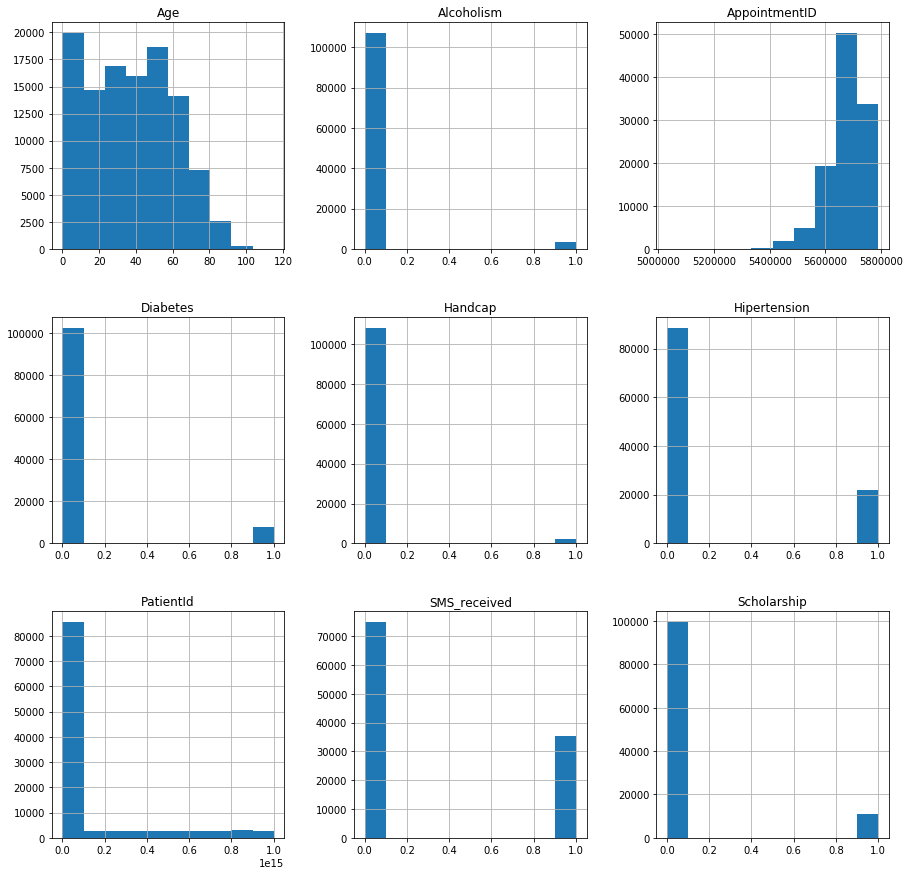

In [20]:
ns_df.hist(figsize = (15,15));

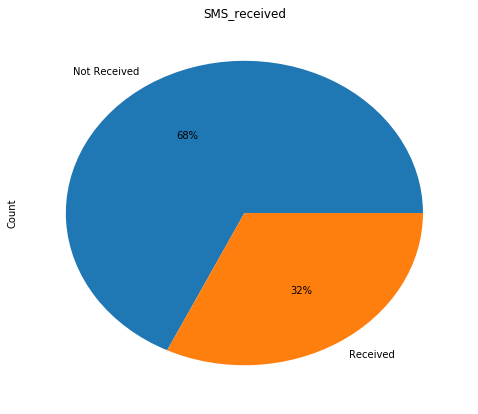

In [21]:
import matplotlib.pyplot as plt
ns_df['SMS_received'].value_counts().plot(kind="pie",labels=["Not Received","Received"],figsize = (8,7),autopct='%1.0f%%')
plt.ylabel('Count')
plt.title('SMS_received');

In [22]:
#its time for me to comfirm if receiving a Message and not receive have any effect on get patients to show to their appointments:



Messages_count =ns_df.groupby("SMS_received")["No-show"].value_counts()
Messages_count

SMS_received  No-show
0             No         62389
              Yes        12503
1             No         25660
              Yes         9775
Name: No-show, dtype: int64

In [23]:
message_Sms = (Messages_count / Messages_count.groupby(level=0).sum() * 100).unstack()
message_Sms.index = ["NOt Received", "Received"]
message_Sms

No-show,No,Yes
NOt Received,83.305293,16.694707
Received,72.414280,27.585720


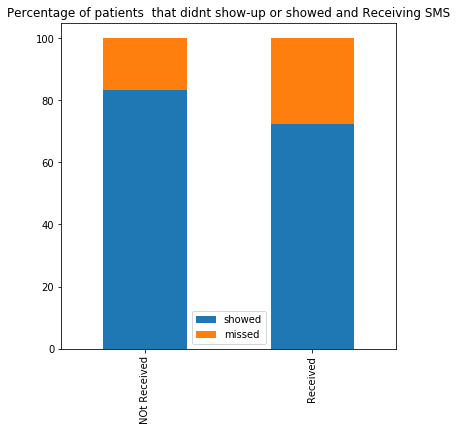

In [26]:
message_Sms.plot(kind="bar",figsize = (6,6),stacked=True)
plt.legend(["showed","missed"])
plt.title("Percentage of patients  that didnt show-up or showed and Receiving SMS");

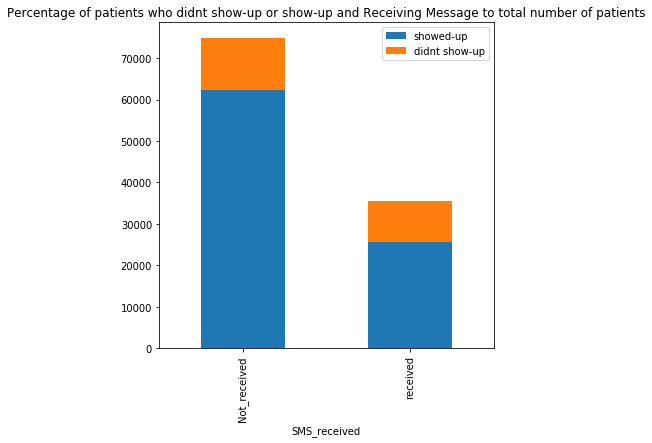

In [27]:
Messages_count.unstack().sort_values(by="Yes",ascending=False).plot(kind="bar",figsize = (6,6),stacked=True).set_xticklabels(["Not_received", "received"]);
plt.legend(["showed-up","didnt show-up"])
plt.title("Percentage of patients who didnt show-up or show-up and Receiving Message to total number of patients");

In [28]:
#if i also want to get the percentage of patients who (recived Messages or didnt receive Messages) to (didnt show-up or show-up)
Message_notreceive = (ns_df.groupby("No-show")["SMS_received"].value_counts()/(ns_df.groupby("No-show")["SMS_received"].value_counts().groupby(level=0).sum()/100)).unstack()
Message_notreceive.columns = ["Not_received", "received"]
Message_notreceive 

,Not_received,received
No-show,,
No,70.857136,29.142864
Yes,56.122632,43.877368


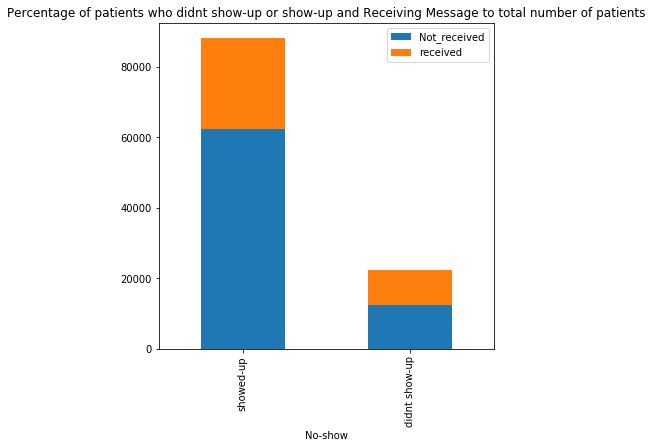

In [29]:
#if i also want to get the percentage of patients who (recived Messages or didnt receive Messages) to (didnt show-up or show-up)
ns_df.groupby("No-show")["SMS_received"].value_counts().unstack().plot(kind="bar",figsize = (6,6),stacked=True).set_xticklabels(["showed-up","didnt show-up"])
plt.legend(["Not_received", "received"]);

plt.title('Percentage of patients who didnt show-up or show-up and Receiving Message to total number of patients');


In [30]:
#68% of patients did not received a message from the hospital and 32% of the patient received the message,Although receiving the message didn't make patients more likely to show to their appointments.

### Research Question 2  (what is the percentage of patients that missed their appointment)

In [31]:
ns_df.columns = ns_df.columns.map(str.lower)

In [32]:
ns_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
ns_df['no-show'].describe()

count     110327
unique         2
top           No
freq       88049
Name: no-show, dtype: object

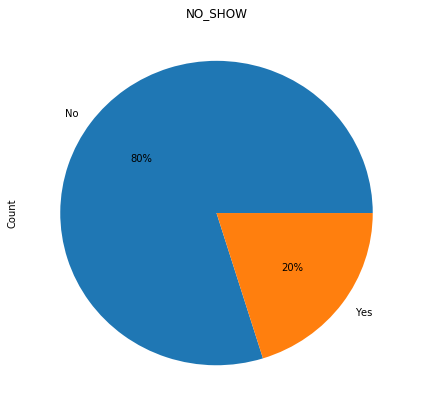

In [34]:
import matplotlib.pyplot as plt
ns_df['no-show'].value_counts().plot(kind="pie",labels=["No","Yes"],figsize = (7,7),autopct='%1.0f%%')
plt.ylabel('Count')
plt.title('NO_SHOW');


In [35]:
#80% of patient showed up for their appointment and the remain 20% missed and didnt show up for their appointments as show.

# Does the age of the patient have a significant effect on showing up and not showing up for appointments?


In [36]:
#mask making which is useful for my next analysis  
dint_showup =ns_df["no-show"] == "Yes"
showed_up =ns_df["no-show"] == "No"

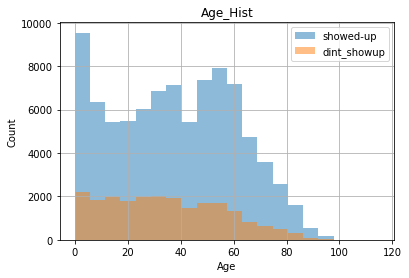

In [37]:
# making hist() for the patient's age
ns_df[showed_up].age.hist(alpha=0.5, bins=20,label="showed-up")
ns_df[dint_showup].age.hist(alpha=0.5,bins=20,label="dint_showup")
plt.title("Age_Hist")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend();

In [38]:
# value counts for no-show grouped by age on my data set
age_count =ns_df.groupby("age")["no-show"].value_counts()
age_count

age  no-show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: no-show, Length: 203, dtype: int64

In [39]:
#between 1-65 years old it showed that the rate of didnt show-up is higher than the rate of no-show from 65 and above.also the age range contain all ages from 0 to 115.

# Does the patient health condition have any effect on patients not showing up?



In [40]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110327 non-null float64
appointmentid     110327 non-null int64
gender            110327 non-null object
scheduledday      110327 non-null datetime64[ns, UTC]
appointmentday    110327 non-null datetime64[ns, UTC]
age               110327 non-null int64
neighbourhood     110327 non-null object
scholarship       110327 non-null int64
hipertension      110327 non-null int64
diabetes          110327 non-null int64
alcoholism        110327 non-null int64
handcap           110327 non-null int64
sms_received      110327 non-null int64
no-show           110327 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


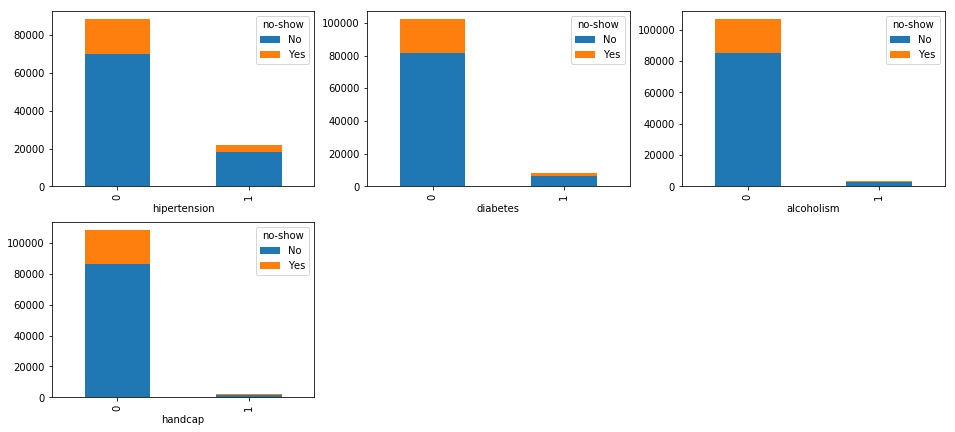

In [41]:
# i want to create a list of all the disease conditions which are hipertension,diabetes,alcoholism and handcap to know if they have any effect on patients not showing up.
Conditions_ns =['hipertension', 'diabetes', 'alcoholism', 'handcap']

ptl = plt.figure(figsize=(16, 11))
for i, var in enumerate(Conditions_ns):
    ax = ptl.add_subplot(3, 3, i+1)
    ns_df.groupby([var, 'no-show'])[var].count().unstack('no-show').plot(ax=ax, kind='bar', stacked=True)


In [42]:
#Variables such as hipertension, diabetes, alcoholism and handcap are the health conditions looked upon,hypertension tend to have lower no-shows range compare to diabetes patient and the alcoholism and handcap patients.

# Factors on the data set that can help predict their will be a no-show or show-up?

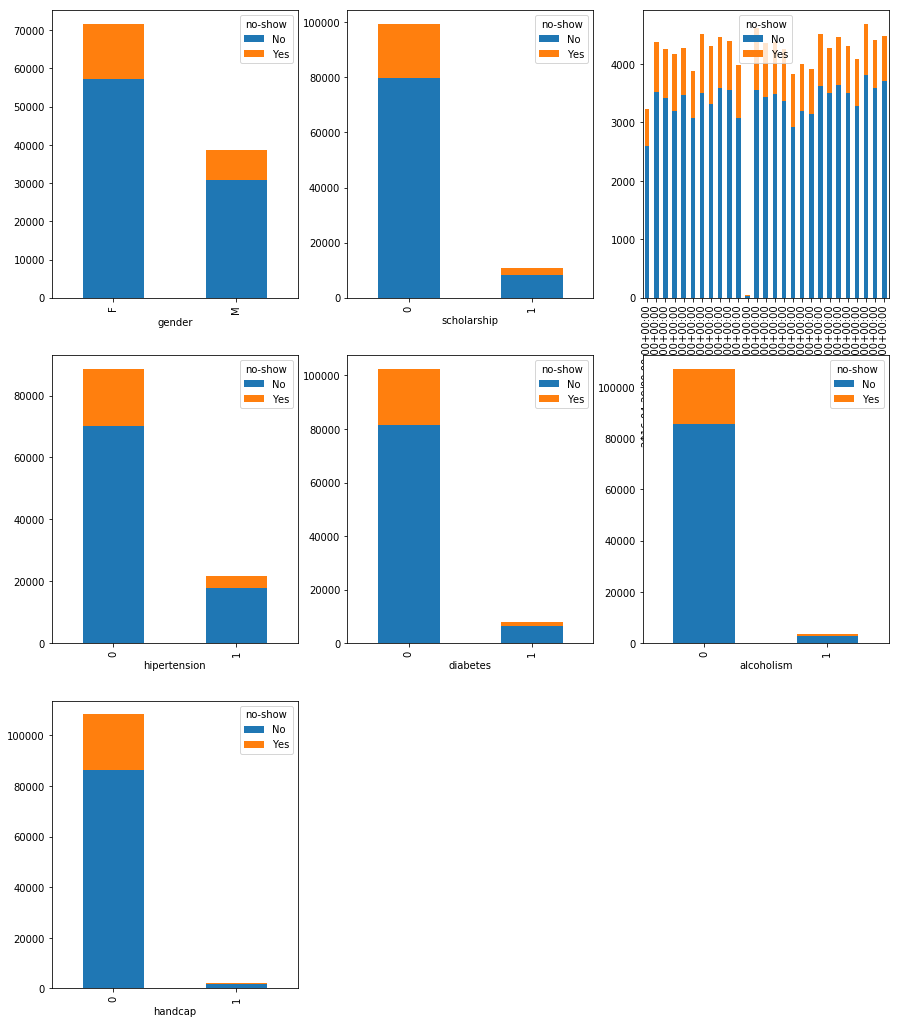

In [46]:
# i want to create a list of some the varaibles on the data set that can help me predict didnt show-up and show-up on the patients.
Conditions_nss =['gender','scholarship','appointmentday','hipertension', 'diabetes', 'alcoholism', 'handcap']

ptll = plt.figure(figsize=(16, 15))
for i, var in enumerate(Conditions_nss):
    ax = ptll.add_subplot(3, 3, i+1)
    ns_df.groupby([var, 'no-show'])[var].count().unstack('no-show').plot(ax=ax, kind='bar',figsize = (15,18), stacked=True)


In [47]:
#different categories on this chart showed that the variables have allot in common and are alike. no low correlation or no Significant indication that the variables selected have an impact on show-up or didnt show-up Independent factor.

# limitations


 
 i did encounter some limitations which i stated below;


1. This dataset is single centre and the time duration also is a top key limitation on this data set, the AppointmentDay spans is just bit more than a month according to the data set, which can only means that the data set given is only a snapshot of complete data, which is a limitation . I can’t over rule the fact that there are no missing values in this data set but making exact predictions and analysis on a snapshot data is going to be difficult and the analysis might not make a representation of the whole data. this short period doesn't make the data reliable to make a strong correlation with the no-show situation.

2. the Inconsistencies in Data is also a limitation.


3. There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.

4. The dataset didn't explain why the patients reason for the booking an appointment and also the consultation doctor specialisation. This would have helped in making better analysis and predictions for the No-Show situation which may give an additional explanation about why they miss their appointments.











<a id='conclusions'></a>
## Conclusions



Before i answer my question i will like to reveiw my observation on my hist i ploted above;

    Histogram observations :

* age: From the histogram above i see there are more younger patient in the data set, The age is skewed to the right and the no-show data set shows that the data set is an unimodal.The mean of right-skewed data is located in the right side of the graph and is greater than median of this data set.Generally the age distribution is actually evenly and the number of patients keep reducing from age 65 upward.

* alcoholic patient : Most of the patients on this data set are not alcoholics the percentage is low.

* hypertension: Most patients do not have hypertension.

* diabetes: Most of the patients are not diabetes but we cant overloook that thier are still disbetes patients on the data set.

* handicap: in this handicap categories just few handicapted patients. 


Q1. Could receiving or not receiving an sms message be a determinant factor to not showing up for the appointment        booked?

    its safe to say most patients that book/schedule an appointment did not Receive the message. 68% of patients did not received a message from the hospital and 32% of the patient received. According to the data, receiving an SMS, didn't make patients more likely to show to their appointments as a matter of fact they showed up regardless of not receiving the messages. but we cant ignore the fact that those that eventually got the messages did show up more than those that didnt.
    
 Q2. what is the percentage of patients that missed their appointment?

    from my finding and my pie chart 80% of pateint showed up for their appointment and the remain 20% missed and didnt show up for their appointments as stated above. which only means one in every five appointments were definitely missing from the data i worked with.
    
 Q3. Does the age of the patient have a significant effect on showing up and not showing up for appointments?
    
    the younger age show up more often than people between 50-60 and from 60 above the rate of showing up reduced which i can say as a result maybe old age standing as a key factor,also between 1-65 years old it showes that the rate of didnt show-up is higher than when they got older which is 65 and above.
    
    
 Q4. Does the patient health condition have any effect on patients not showing up ?
    
    i found that patients suffering from hypertension tend to have lower no-shows but more than diabetes, the diabetic patients also have a low no show compare to does without diabetes which seems more like the diabetes patients are more careful and observation of their appointments, more like they take medial appointments more seriously than non diabetes patients,lower no-shows are observed among patients suffering from the medical conditions stated above while healthy patients are more likely to miss their appointments comepare to does with medical conditions. Most of the patients in this data set are more alcholics than been diabetic, i also looked into the handicap dataset i found out most people are not handicap.
    
 Q5. Factors on the data set that can help predict their will be a no-show or show-up?
    
    the factors i observed on show-up or didnt show-up data set, i noticed that different categories i used as a dertermining factor have allot in common and looks just alike. and there is no low correlation or no Significant indication that any of the variables i selected have an impact on show-up or didnt show-up Independent factor. my bar chart helped me confirm that there is a 20% of didnt show-up rate for most categories.
    



  In conclusion,i did a deep search into the no-show dataset,i founds some errors and i did the data cleaning,took out all the removing wrong data,added new features based on the data i used for the project.I investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent variable No-SHOW which was the only exploratory analysis on this no show data set. from the observation and investigation showes that there is no strong correlation btw the dependable varaible compared to the independent varaible of No-show, how ever many potential correlations may remain uncovered and will need further investigation so as to provide more insights and find more out if there are correlations in the dataset.






## Submitting your Project 






In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0